In [ ]:
import pandas as pd

In [ ]:
data = pd .read_csv('/content/hr _salary.csv')

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.to_csv('cleaned_dataset.csv',index=False)

In [ ]:
data.describe()

,Age,Years of Experience,Current Salary,Left
count,200000.000000,200000.00000,200000.000000,200000.000000
mean,39.513740,14.49468,65012.619710,0.499735
std,11.539415,8.64203,20205.982014,0.500001
min,20.000000,0.00000,30000.000000,0.000000
25%,30.000000,7.00000,47506.750000,0.000000
50%,40.000000,14.00000,65028.500000,0.000000
75%,50.000000,22.00000,82526.000000,1.000000
max,59.000000,29.00000,99999.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt


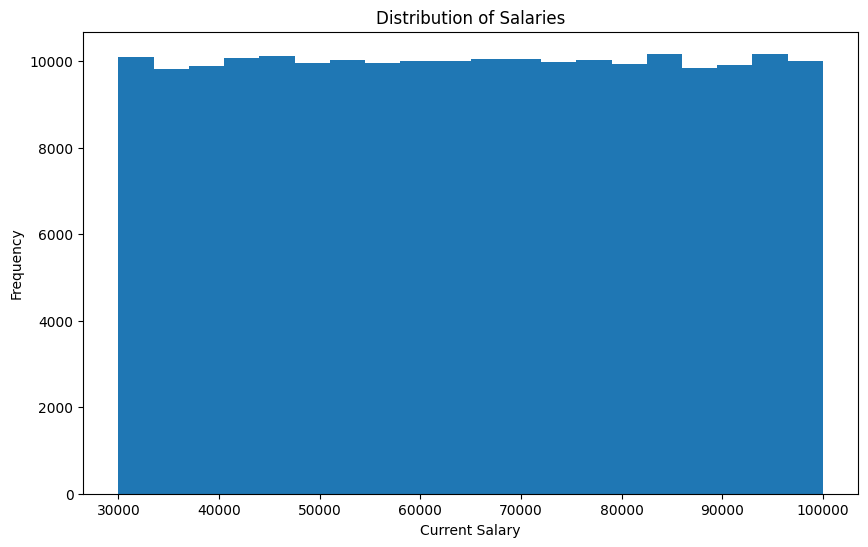

In [ ]:
# Visualize the distribution of salaries using a histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Current Salary'], bins=20)
plt.xlabel('Current Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salaries')
plt.show()

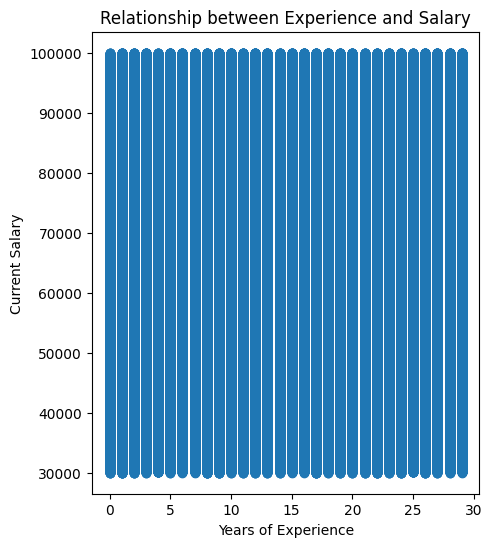

In [ ]:
# Visualize the relationship between experience and salary using a scatter plot
plt.figure(figsize=(5, 6))
plt.scatter(data['Years of Experience'], data['Current Salary'])
plt.xlabel('Years of Experience')
plt.ylabel('Current Salary')
plt.title('Relationship between Experience and Salary')
plt.show()


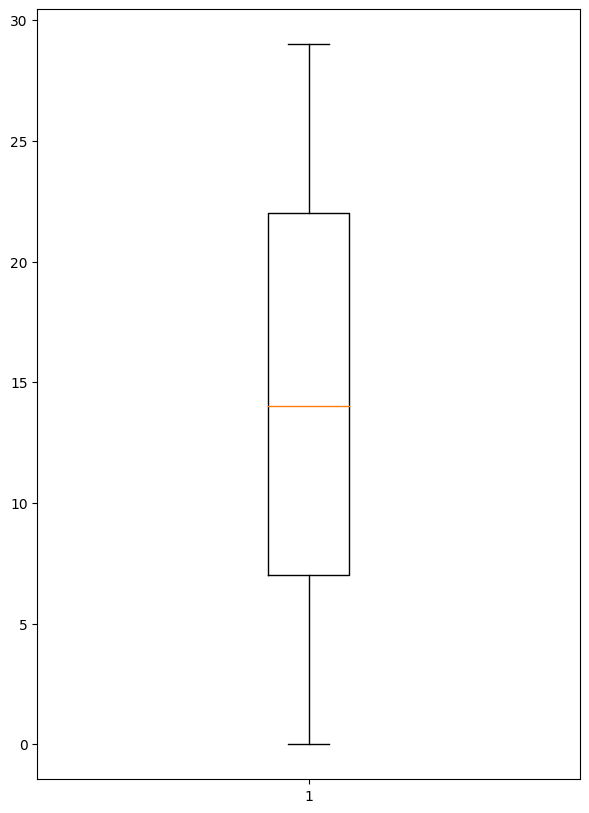

In [ ]:
plt.boxplot(data['Years of Experience'])
plt.show()

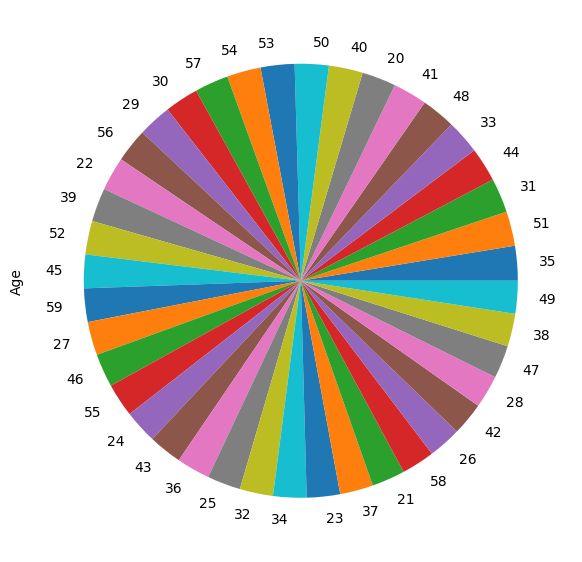

In [ ]:
data['Age'].value_counts().plot(kind='pie')
plt.show()

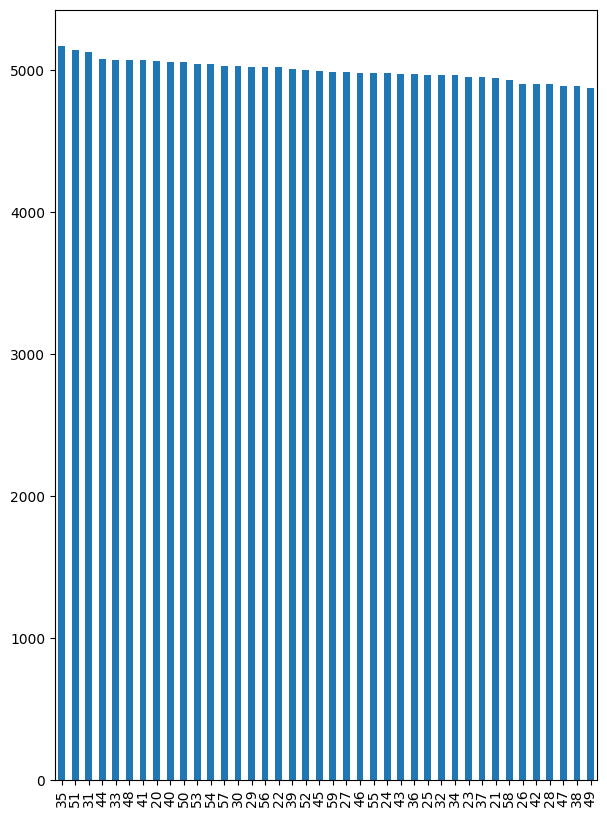

In [ ]:
data['Age'].value_counts().plot(kind='bar')
plt.show()

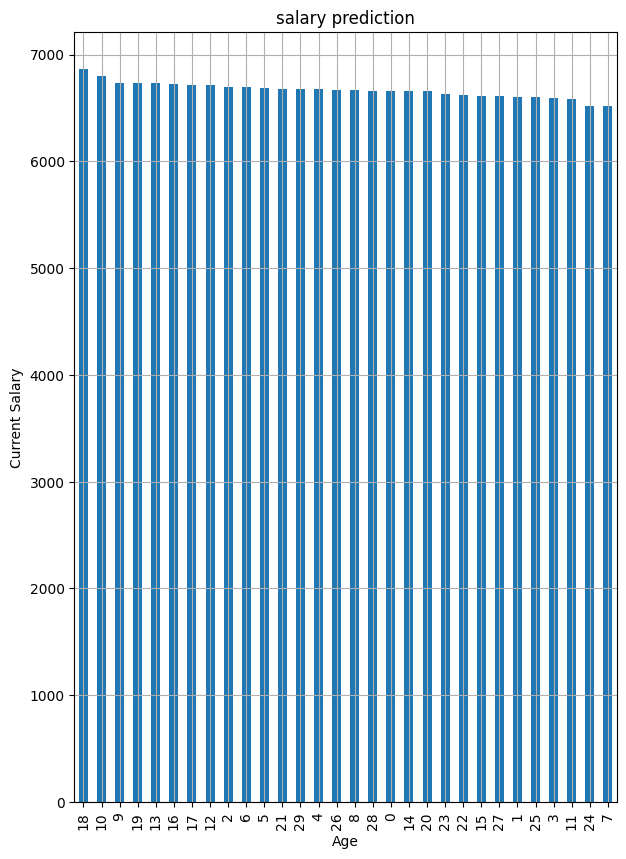

In [ ]:
data['Years of Experience'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(7,5)
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.title('salary prediction')
plt.grid()
plt.show()

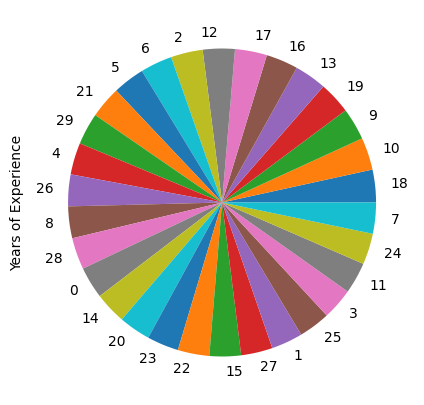

In [ ]:
data['Years of Experience'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize'] = (7,10)
plt.show()

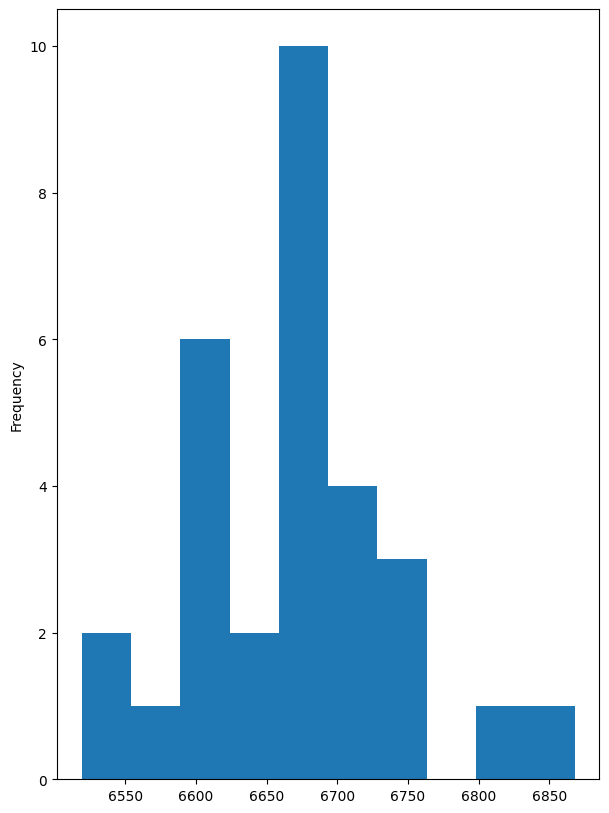

In [ ]:
data['Years of Experience'].value_counts().plot(kind='hist')
plt.rcParams['figure.figsize'] = (7,10)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

# Load the HR dataset
data = pd.read_csv('/content/hr _salary.csv')

# Assume 'Left' as 1 by default to indicate job switch
data['Left'] = data['Left'].fillna(1)

# Filter data for HR professionals who switched jobs
switched_jobs_data = data[data['Left'] == 1]

# Split the dataset into features (X) and target variable (y)
X = switched_jobs_data[['Years of Experience', 'Age']]
y = switched_jobs_data['Current Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Save the model as a pickle file
joblib.dump(model, 'salary_prediction_model.pkl')

# Predict the salaries for the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

# Filter a particular person by their age, experience, and name
person_name = "John Doe"
person_age = 50
person_experience = 40

# Predict the salary for the particular person
base_salary = model.predict([[person_experience, person_age]])
experience_multiplier = 1.05  # Multiplier to adjust salary based on experience

# Increase salary based on experience
adjusted_salary = base_salary * (experience_multiplier ** person_experience)

# Print the salary after switching jobs
print('Salary of HR professional {} after switching jobs: ${}'.format(person_name, round(adjusted_salary[0], 2)))

Root Mean Squared Error: 20165.891213689083
Salary of HR professional John Doe after switching jobs: $457574.51


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib

In [ ]:
data = pd.read_csv('/content/hr _salary.csv')

In [ ]:
data['Left'] = data['Left'].fillna(1)

In [ ]:
X = switched_jobs_data[['Years of Experience', 'Age']]
y = switched_jobs_data['Current Salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

joblib.dump(model, 'salary_prediction_model.pkl')


['salary_prediction_model.pkl']

In [ ]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 20165.891213689083


In [ ]:
person_name = "John Doe"
person_age = 50
person_experience = 40

In [ ]:
base_salary = model.predict([[person_experience, person_age]])
experience_multiplier = 1.05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
adjusted_salary = base_salary * (experience_multiplier ** person_experience)

In [ ]:
print('Salary of HR professional {} after switching jobs: ${}'.format(person_name, round(adjusted_salary[0], 2)))

Salary of HR professional John Doe after switching jobs: $457574.51
